In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
# ✅ Fix the random seed so that every run generates exactly the same random numbers.
# This makes the experiment reproducible.
np.random.seed(38) 

# ✅ Generate 100 random X values between -3 and +3
# np.random.rand(100, 1) → values in [0, 1)
# 6 * rand → [0, 6)
# 6 * rand - 3 → [-3, 3)
X = 6 * np.random.rand(100, 1) - 3 # Creating 100 data sets(random) (-3 helps to add the outliers)
# ✅ Generate y using a quadratic relationship + some random noise (outliers)
# True underlying function: y = 0.5 * X^2 + 1.5 * X + 2
# np.random.rand(100, 1) adds random noise so the data is not perfectly on the curve
y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.rand(100, 1)  ## 0.5 * X ** 2 + 1.5 * X + 2 - quadratic equation ax² + bx + c (np.random.rand(100, 1) - outliers )
## quadratic equation used 
# y = 0.5X² + 1.5X + 2 + outliers

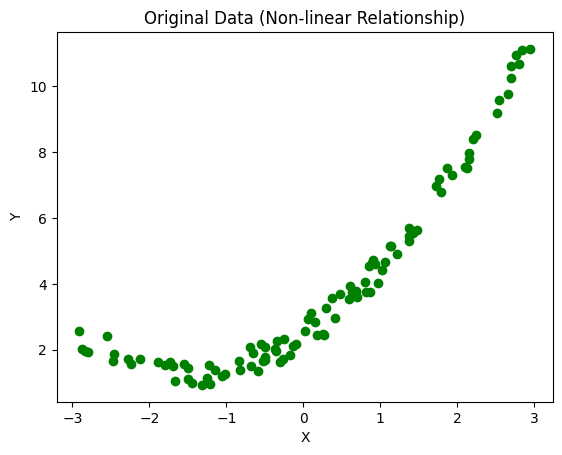

In [218]:
# ✅ Visualize the raw data to understand the pattern
plt.scatter(X, y, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data (Non-linear Relationship)')
plt.show()

From this plot, we can visually see a curved (non-linear) pattern.

In [219]:
from sklearn.model_selection import train_test_split
# ✅ Split the data into training and testing sets
# test_size=0.2 → 20% data for testing, 80% for training
# random_state=42 → same split every time (reproducible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
# ✅ Implement Simple Linear Regression (straight line fit)
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
# ✅ Train (fit) the linear regression model on the training data
linear_regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [221]:
from sklearn.metrics import r2_score

# ✅ Evaluate model performance on the test set using R² score
# R² close to 1 → good fit, close to 0 or negative → poor fit
r2 = r2_score(y_test, linear_regression.predict(X_test))

print(f"Accuracy score (R² for Linear Regression): {r2}")

Accuracy score (R² for Linear Regression): 0.6596521334971635


👉 Because the true relationship is quadratic, a straight line model, cannot capture the curvature, so R² will be relatively low.

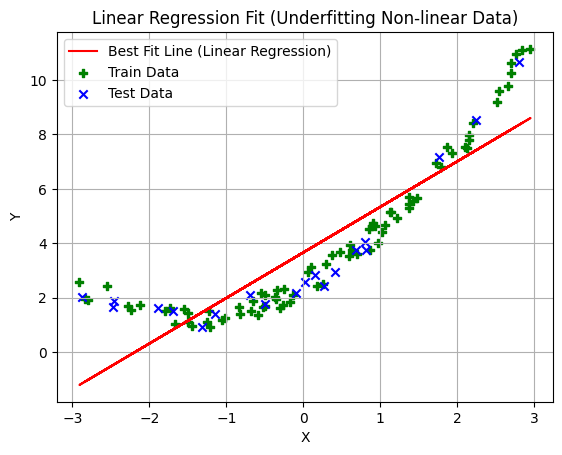

In [222]:
# ✅ Visualize the simple linear regression line vs train & test data
plt.plot(
    X_train, 
    linear_regression.predict(X_train), 
    color='red', 
    label='Best Fit Line (Linear Regression)'
)
# Training points — using 'P' marker (plus-filled marker)
plt.scatter(X_train, y_train, color='green', marker='P', label='Train Data')

# Testing points — using 'x' marker
plt.scatter(X_test, y_test, color='blue', marker='x', label='Test Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Linear Regression Fit (Underfitting Non-linear Data)')
plt.show()

| Marker | Shape            |
| ------ | ---------------- |
| `'o'`  | Circle (default) |
| `'^'`  | Triangle (up)    |
| `'v'`  | Triangle (down)  |
| `'s'`  | Square           |
| `'p'`  | Pentagon         |
| `'*'`  | Star             |
| `'D'`  | Diamond          |
| `'X'`  | Filled X         |
| `'+'`  | Plus             |
| `'.'`  | Point            |
| `'x'`  | X                |


if you look at the best fit line, we have good amount of error, lets see how we can solve this using polynomial regression

In [223]:
# ------------------------------------------------------------------------------------
# ✅ POLYNOMIAL REGRESSION (degree = 2)
# ------------------------------------------------------------------------------------

from sklearn.preprocessing import PolynomialFeatures

In [224]:
# ✅ Create a PolynomialFeatures transformer for degree 2
# include_bias=True → adds a column of 1s for the intercept term
polynomial = PolynomialFeatures(degree=2, include_bias=True)

# ✅ VERY IMPORTANT:
# We use fit_transform ONLY on the training data.
# - fit_transform(X_train): learns how to expand features (based on shape/num features)
#   and then applies the transformation to X_train.
X_train_poly = polynomial.fit_transform(X_train)

# ✅ For the test data, we ONLY call transform, NOT fit_transform.
# This ensures we apply EXACTLY the same transformation learned from the training data.
X_test_poly = polynomial.transform(X_test)

In [225]:
print("Sample of X_train_poly (degree=2):")
print(X_train_poly[:5])
# - the below out put is in the form of 1, X₁ and X₁²
# 1.00000000e+00 --> is bias 1.49958130e+00 --> X₁ 2.24874408e+00 --> X₁², polynomial° = 2

# Interpretation for degree=2 with a single feature X:
# Each row looks like: [1, X₁, X₁²]
# 1 → bias term
# X₁ → original feature
# X₁² → squared feature

Sample of X_train_poly (degree=2):
[[ 1.         -1.4995813   2.24874408]
 [ 1.          2.09775543  4.40057785]
 [ 1.          2.84861789  8.11462386]
 [ 1.         -2.2368421   5.0034626 ]
 [ 1.          1.37277964  1.88452393]]


In [226]:
print("Sample of X_test_poly (degree=2):")
print(X_test_poly[:5])

Sample of X_test_poly (degree=2):
[[ 1.         -2.88087884  8.29946288]
 [ 1.          0.41704428  0.17392593]
 [ 1.          0.81611181  0.66603848]
 [ 1.         -2.45744416  6.0390318 ]
 [ 1.         -1.69272767  2.86532695]]


In [227]:
# ✅ Train a linear regression model on the polynomial features
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# ✅ Predict on the test set using the polynomial model
y_pred = linear_regression.predict(X_test_poly)

# ✅ Evaluate R² score for polynomial regression (degree 2)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Polynomial degree=2): {r2}")

R² Score (Polynomial degree=2): 0.9904794776100981


In [228]:
# ✅ Check learned coefficients (optional, for interpretation)
linear_regression.coef_

array([[0.        , 1.52177216, 0.50254276]])

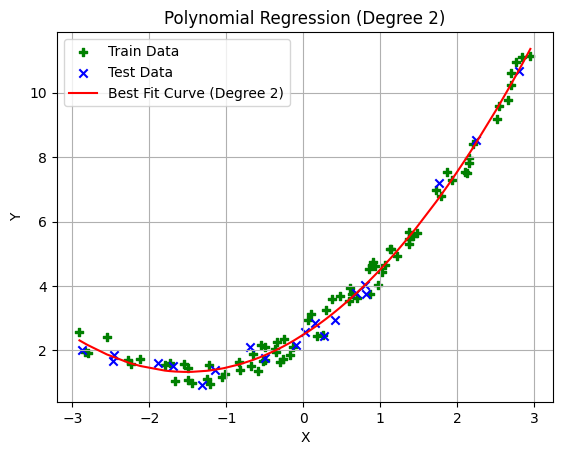

In [229]:
# ✅ Visualize the polynomial regression (degree 2)
# To plot a smooth curve, we sort X_train and corresponding predictions.
sorted_idx = X_train.flatten().argsort()
X_sorted = X_train[sorted_idx]
y_pred_sorted = linear_regression.predict(X_train_poly)[sorted_idx]

plt.scatter(X_train, y_train, color='green', marker='P', label='Train Data')
plt.scatter(X_test, y_test, color='blue', marker='x', label='Test Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Best Fit Curve (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression (Degree 2)')
plt.show()

In [230]:
# ------------------------------------------------------------------------------------
# ✅ POLYNOMIAL REGRESSION (degree = 3) – more flexible curve
# ------------------------------------------------------------------------------------

# Now we increase the degree to 3 to see if we get an even better fit.
polynomial = PolynomialFeatures(degree=3, include_bias=True)

# Again: fit_transform ONLY on training data
X_train_poly = polynomial.fit_transform(X_train)

# Only transform on test data using the same fitted transformer
X_test_poly = polynomial.transform(X_test)

In [231]:
print("Sample of X_train_poly (degree=3):")
print(X_train_poly[:5])
# For degree=3 with one feature X, each row looks like:
# [1, X, X², X³]

Sample of X_train_poly (degree=3):
[[  1.          -1.4995813    2.24874408  -3.37217457]
 [  1.           2.09775543   4.40057785   9.23133609]
 [  1.           2.84861789   8.11462386  23.11546266]
 [  1.          -2.2368421    5.0034626  -11.1919558 ]
 [  1.           1.37277964   1.88452393   2.58703607]]


In [232]:
# Train a new linear regression model on the degree-3 polynomial features
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# Predict on test data
y_pred = linear_regression.predict(X_test_poly)

# R² score for degree-3 polynomial regression
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Polynomial degree=3): {r2}")

R² Score (Polynomial degree=3): 0.9899342322070093


Sample of X_new_poly (degree=3):
[[  1.          -3.           9.         -27.        ]
 [  1.          -2.96984925   8.82000455 -26.19408385]
 [  1.          -2.93969849   8.64182723 -25.40436647]
 [  1.          -2.90954774   8.46546804 -24.6306834 ]
 [  1.          -2.87939698   8.290927   -23.8728702 ]]


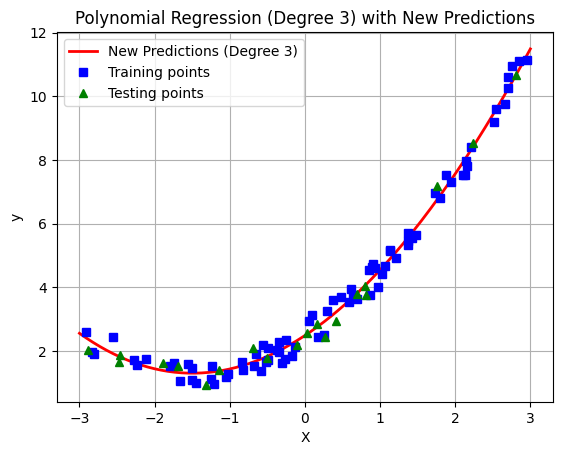

In [233]:
# ------------------------------------------------------------------------------------
# ✅ PREDICTION AND VISUALIZATION ON NEW X RANGE
# ------------------------------------------------------------------------------------

# Create a smooth range of X values from -3 to 3
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

# Transform this new X using the SAME polynomial transformer (degree=3)
X_new_poly = polynomial.transform(X_new)
print("Sample of X_new_poly (degree=3):")
print(X_new_poly[:5])

# Predict y values for the smooth X range
y_new = linear_regression.predict(X_new_poly)

# Plot the polynomial regression curve and the original data points
# Best-fit curve (degree 3)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions (Degree 3)")

# Training points — blue squares
plt.plot(X_train, y_train, "bs", label='Training points')  # b = blue, s = square

# Testing points — green triangles
plt.plot(X_test, y_test, "g^", label='Testing points')     # g = green, ^ = triangle

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression (Degree 3) with New Predictions')
plt.show()

| Code    | Meaning               |
| ------- | --------------------- |
| `"b-"`  | blue solid line       |
| `"g--"` | green dashed line     |
| `"k:"`  | black dotted line     |
| `"m-."` | magenta dash-dot line |
| `"c--"` | cyan dashed line      |
| `"y-"`  | yellow solid line     |

<br/>


| Code | Shape           |
| ---- | --------------- |
| `.`  | Point           |
| `o`  | Circle          |
| `s`  | Square          |
| `^`  | Triangle (up)   |
| `v`  | Triangle (down) |
| `D`  | Diamond         |
| `p`  | Pentagon        |
| `X`  | Filled X        |
| `*`  | Star            |
